---
## K-Means algorithm
This notebook represents my implementation of the K-Means algorithm, which finds clusters in data by successively updating their position based on the datapoints which are closest the respective cluster. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

We first create some random data for representation

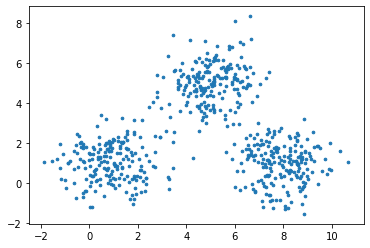

In [13]:
%matplotlib inline
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

---
# init_centroids(datapoihnts, amount)
init_centroids() initializes the centroids by sampling from the datapoints.
# find_closest_centroids(datapoints, centroids)
find_closest_centroids() simply takes the euclidean distance from each datapoint to each centroid and returns a list of indices, which indicate the closest centroid.
# centroid_means(data, idxs, no_centroids, dimensionality)
centroid_means() computes the new position of each centroid by calculating the mean of the datapoints which are assigned to it.

In [14]:
def init_centroids(datapoints, amount):
    return datapoints[np.random.choice(datapoints.shape[0], amount)]

def find_closest_centroids(datapoints, centroids):
    idxs = np.zeros(datapoints.shape[0])
    for i in range(len(datapoints)):
        distances = np.power(np.array(datapoints[i] - centroids), 2)
        idxs[i] = np.argmin(np.sum(distances, axis = 1))
    return idxs

def centroid_means(data, idxs, no_centroids, dimensionality):
    new_centroids = np.zeros((no_centroids, dimensionality))
    for i in range(no_centroids):
        matched_datapoints = data[i == idxs]
        new_centroids[i] = np.mean(matched_datapoints, axis = 0)
    return new_centroids

---
Here's just a quick visualization of how K-Means works.

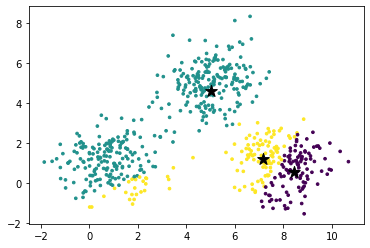

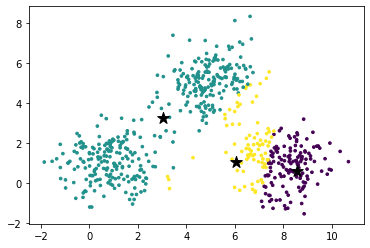

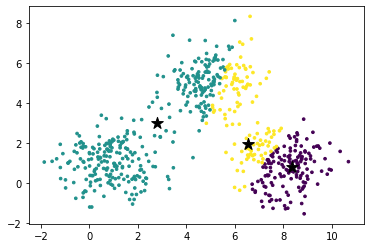

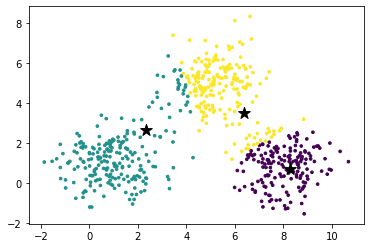

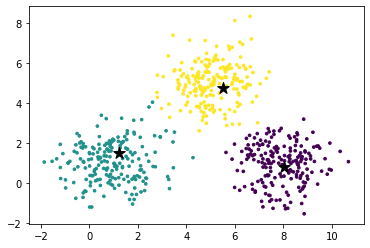

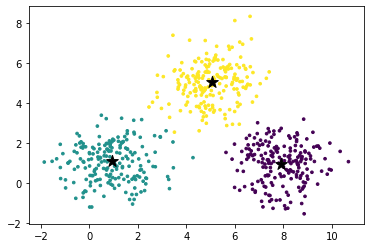

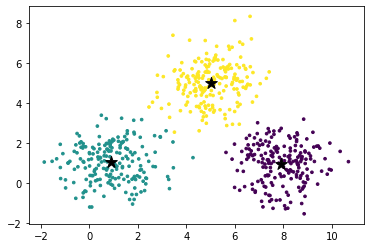

In [16]:
%matplotlib inline
no_centroids = 3
old_centroids = init_centroids(data, no_centroids)
new_centroids = old_centroids
err = 1
while err != 0:
    idxs = find_closest_centroids(data, new_centroids)
    plt.scatter(data[:,0], data[:,1], c = idxs, s=7)
    plt.scatter(new_centroids[:,0], new_centroids[:,1], marker='*', c="0", s=150)
    old_centroids = new_centroids
    new_centroids = centroid_means(data,idxs, no_centroids, 2)
    err = np.power(np.array(new_centroids - old_centroids), 2)
    err = np.sum(err)
    plt.pause(0.2)

---
The algorithm can be also used for image compression (although there are better alternatives), by finding clusters in the pixel values and then using the centroids instead. Below is an example of it.
---

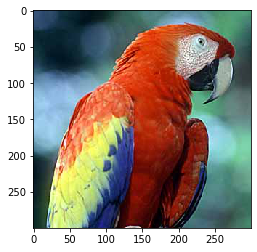

In [7]:
from PIL import Image
img_data = np.asarray(Image.open("Hellroter.jpg"))
plt.imshow(img_data)
img_data = img_data / 255.0 #normalize so all values are between 0 and 1
img_data = img_data.reshape(-1, 3)

In [8]:
no_centroids = 16
centroids = init_centroids(img_data, no_centroids)
for i in range(10):
    idxs = find_closest_centroids(img_data, centroids)
    centroids = centroid_means(img_data,idxs, no_centroids, 3)
    print(f"Finished iteration {i+1} out of 10.")

Finished iteration 1 out of 10.
Finished iteration 2 out of 10.
Finished iteration 3 out of 10.
Finished iteration 4 out of 10.
Finished iteration 5 out of 10.
Finished iteration 6 out of 10.
Finished iteration 7 out of 10.
Finished iteration 8 out of 10.
Finished iteration 9 out of 10.
Finished iteration 10 out of 10.


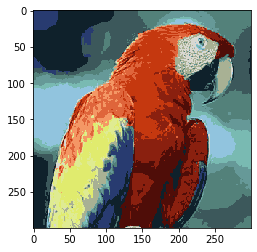

In [9]:
compressed_img = np.array([centroids[int(idx)] for idx in idxs])
compressed_img = compressed_img.reshape(300,300,3)
plt.imshow(compressed_img)